# 8. Проверка знаний

### ✍️ А теперь проверим полученные знания на практике.

### Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

### Датасет содержит следующие признаки:

+ age — возраст
+ sex — пол (1 - мужчина, 0 - женщина)
+ cp — тип боли в груди (4 значения)
+ trestbps — артериальное давление в покое
+ chol — холестерин сыворотки в мг/дл
+ fbs — уровень сахара в крови натощак > 120 мг/дл
+ restecg — результаты электрокардиографии в покое (значения 0,1,2)
+ thalach — достигнута максимальная частота сердечных сокращений
+ exang — стенокардия, вызванная физической нагрузкой
+ oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
+ slope — наклон пикового сегмента ST при нагрузке
+ ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
+ thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

## Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
heart = pd.read_csv('data/heart.csv')

In [4]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0) 
heart['old'].sum()

79

## Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [6]:
age_intervals = pd.cut(heart.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

heart['trestbps_mean'] = 0
heart.loc[heart.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.replace(trestbps_man)
heart.loc[heart.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.replace(trestbps_woman)

In [33]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,-114
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,-127
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,-119
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,-114
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,-112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,-112
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,-121
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,-114
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,-114


## Задание 8.3

Проанализируйте датасет и выберите категориальные признаки.
+ sex
+ cp
+ fbs
+ restecg
+ exang
+ slope
+ ca
+ thal
+ target

## Задание 8.4

Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding)
+ cp
+ restecg
+ slope
+ ca
+ thal

## Задание 8.5

Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?

In [34]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


## Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [35]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


## Задание 8.7

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.
+ [age, old]
+ [ca, ca_1]
+ [slope_2, slope_3]
+ [thal_2, thal_3]
+ [cp, cp_4]
+ [thal_3, thal]
+ [restecg_2, restecg]
+ [slope_2, slope]
+ [restecg_1, restecg_2]
+ [restecg_1, restecg]
+ [restecg, restecg_2]

<AxesSubplot:>

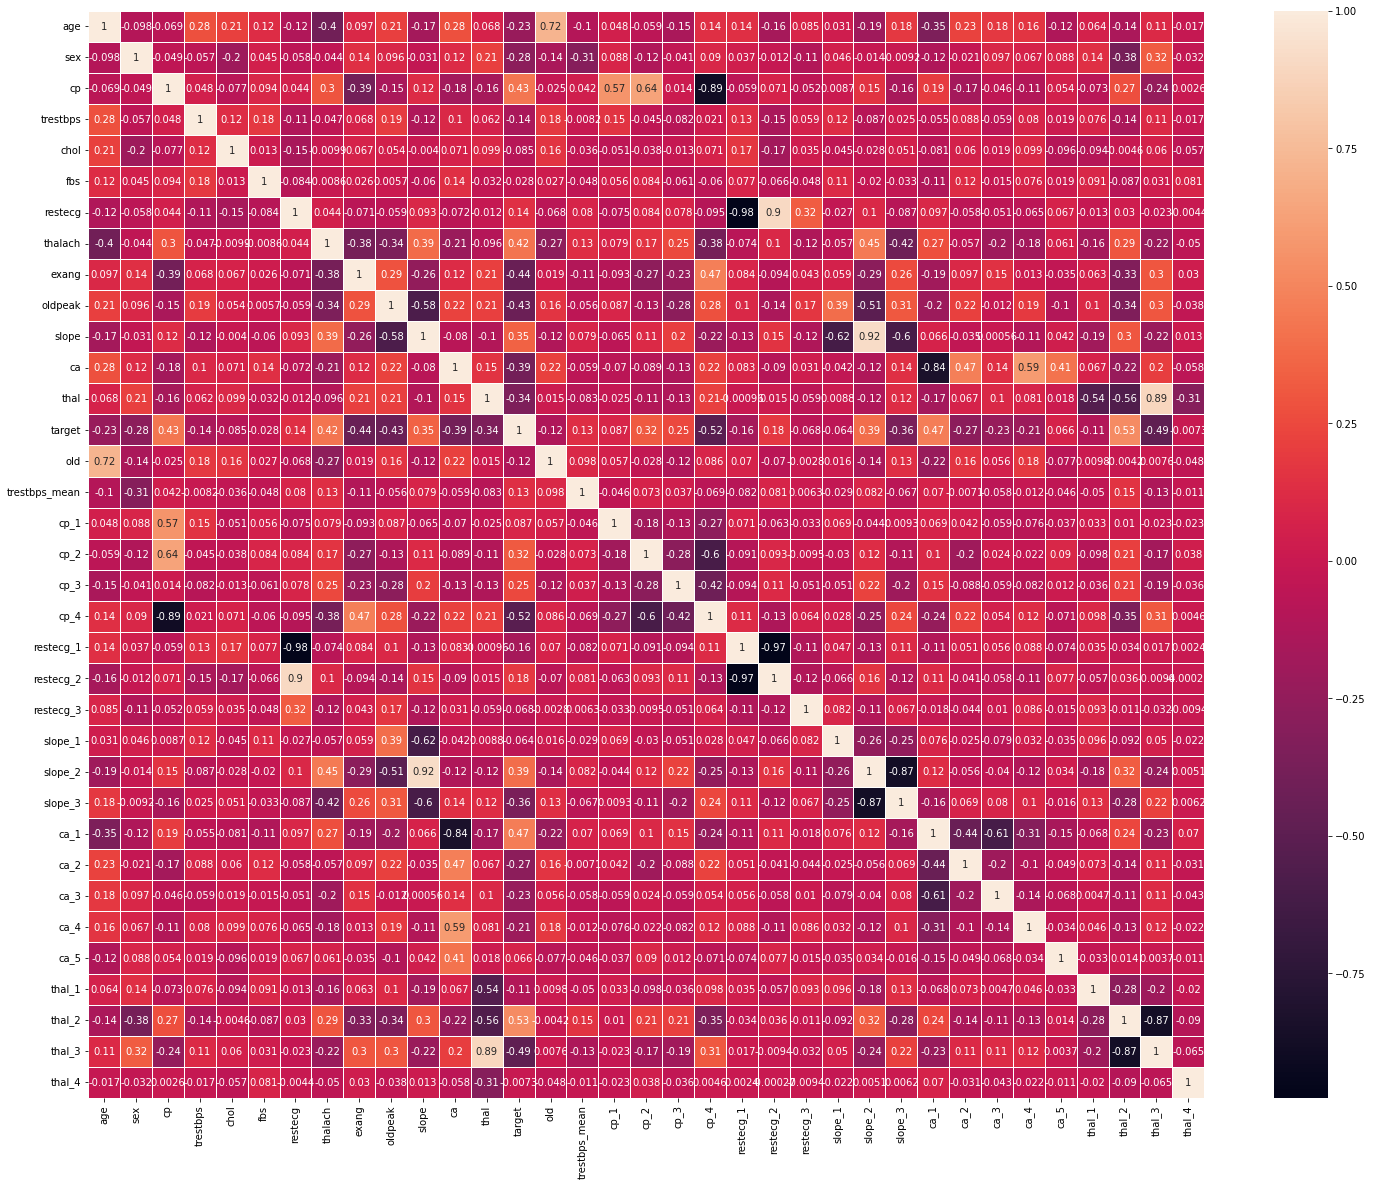

In [39]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(heart_r.corr(), annot=True, linewidths=.5, ax=ax)

# 9. Подведём итоги

## ПОЗДРАВЛЯЕМ!

В этом модуле, посвящённом проектированию признаков, мы:

### УЗНАЛИ:
+ что такое проектирование признаков и его этапы;
+ что такое внешние источники данных;
+ основы кодирования признаков и его методы;
+ основы преобразования признаков и его методы;
+ основы отбора признаков.

### НАУЧИЛИСЬ:

+ создавать новые признаки;
+ использовать внешние источники данных для проектирования признаков;
+ кодировать и преобразовывать признаки;
+ делать отбор не скоррелированных признаков.

## ⭐️ В следующем модуле вы узнаете про гипотезы, значимость признаков и критерии значимости.